In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap

In [2]:
load_from_scratch=True

In [3]:
def calculate_composite_rainfall():
    return 'hi'
    

In [55]:
print(meta.shape)
print(meta_og.shape)
print(meta_2.shape)
tracks = pd.read_csv('/user/home/al18709/work/ibtracks/tc_files.csv')

(15930, 4)
(16253, 5)
(15930, 3)


In [58]:
print(tracks.columns)
og_tracks_grouped = tracks.groupby('sid')

Index(['Unnamed: 0', 'filepath_imerg', 'filepath_mswep', 'filepath_era5',
       'filepath_var', 'sid', 'lat', 'lon', 'name', 'basin', 'sshs', 'year',
       'month', 'day', 'hour'],
      dtype='object')


In [64]:
# load dataset
# load data
if load_from_scratch==True:
	real,inputs,pred,meta = load_tc_data(set='validation',results='ke_tracks')
	real_2,inputs_2,pred_2,meta_2,imput_og,pred_og,meta_og = load_tc_data(set='validation',results='kh_tracks')
	meta_og = pd.read_csv('/user/work/al18709/tc_data_mswep_40/valid_meta.csv')
	meta_valid = pd.read_csv('/user/work/al18709/tc_data_flipped/valid_meta.csv')

	# get subset of storms
	# filepath = '/user/home/al18709/work/ibtracks/miroc6_ssp585_tracks.csv'
	# tracks = pd.read_csv(filepath)
	sids = meta.sid
	sids_unique=sids.drop_duplicates()
	nstorms = len(sids_unique)
	print(sids_unique)
	tracks_grouped = meta.groupby('sid')
	composite_storm_rain = np.zeros((nstorms,100,100))
	i=0
	for sid in sids_unique:
		storm = tracks_grouped.get_group(sid)

		storm_2 = og_tracks_grouped.get_group(sid)

		hourly_rate=[]
		for h in storm_2.hour:
			if h in [3,9,15,21]:
				hour_rate = 3
			elif h in [0,6,12,18]:
				hour_rate = 6
			else:
				hour_rate = 0
			hourly_rate.append(hour_rate)
		print(set(hourly_rate))
		if set(hourly_rate) == {3,6}:
			units_converter = 1/8
		elif 6 in set(hourly_rate):
			units_converter = 1/4
		else:
			units_converter = 0

		# print('storm',len(storm))
		# print('storm_2',len(storm_2))

		print(units_converter)
		storm_lats = storm.centre_lat
		storm_lons = storm.centre_lon
		storm_rain = pred[storm.index,:,:,0]
		mean_storm_rain = np.sum(storm_rain,axis=0)*units_converter
		# storm_month = storm.month
		# storm_year = storm.year
		# storm_v = storm.v
		composite_storm_rain[i,:,:] = mean_storm_rain
		i=i+1

	# save plottable dataset
	composite_rainfall = calculate_composite_rainfall()




else:
	# load plottable dataset
	print('hi')


0        1979002S04179
72       1979083S15184
93       1979174N07143
134      1979230N11246
180      1979252N16259
             ...      
15750    2019302N11118
15800    2020205N26272
15813    2020221N13262
15835    2020272N12257
15880    2020291N32305
Name: sid, Length: 332, dtype: object
{0, 3, 6}
0.25
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{0, 3, 6}
0.25
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{0, 3, 6}
0.25
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{3, 6}
0.125
{

In [65]:
print(composite_storm_rain.shape)
sums = np.sum(composite_storm_rain,axis=(1,2))
top_200_idx = np.argpartition(sums, -200)[-200:]

top_200_storms = composite_storm_rain[top_200_idx,:,:]

composite = np.mean(top_200_storms,axis=0)


(332, 100, 100)


In [66]:
# define cmap
precip_cmap,precip_norm = make_cmap()

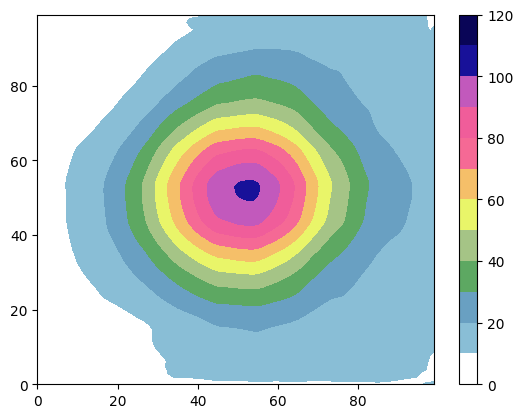

In [73]:

ax = plt.subplot()
im = ax.contourf(composite,cmap=precip_cmap,levels=[0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.colorbar(im,ticks=[0,20,40,60,80,100,120])